# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# ***EDA***

In [5]:
df.shape

(30, 17)

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## **checking null value**

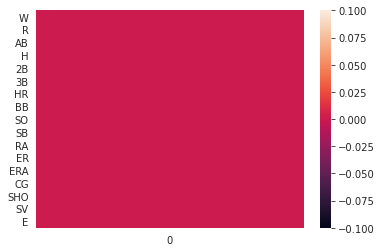

In [7]:
sns.heatmap(df.isnull().sum().to_frame())

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## **Visualization**

In [10]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  sns.regplot(x=i,y='W',data=df)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

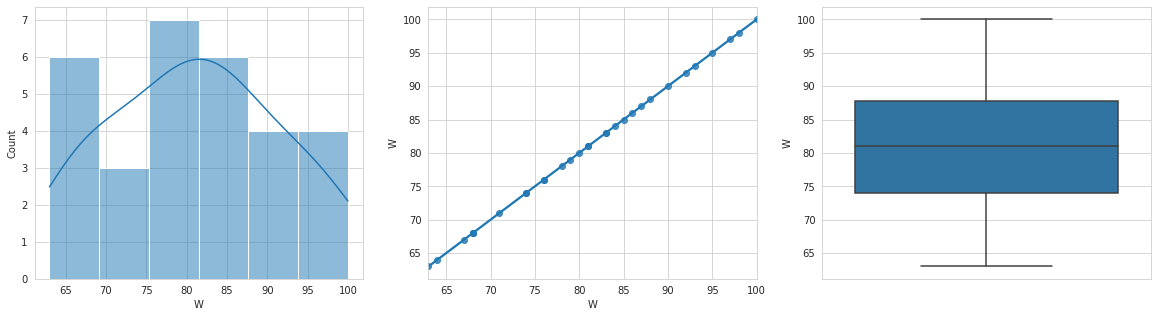

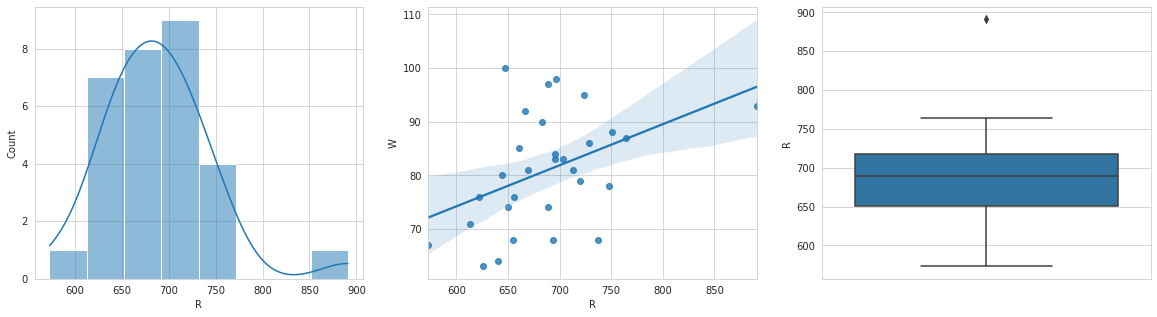

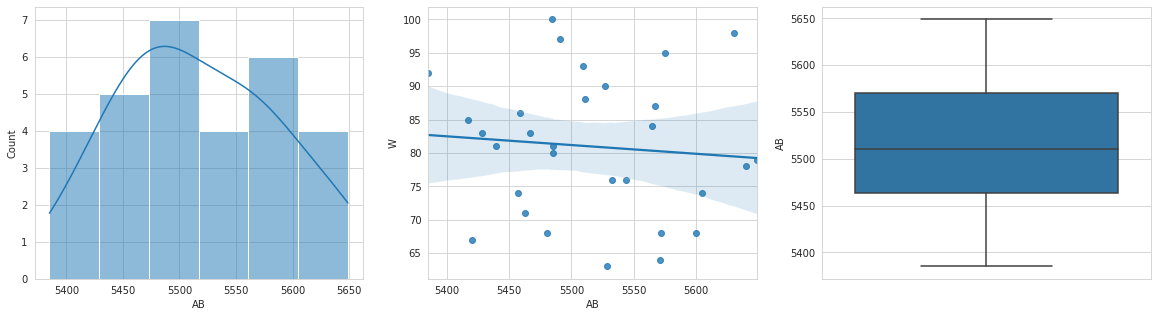

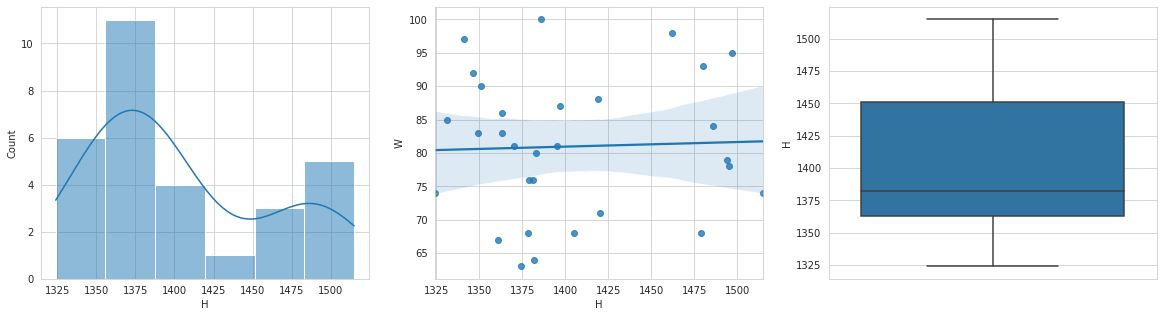

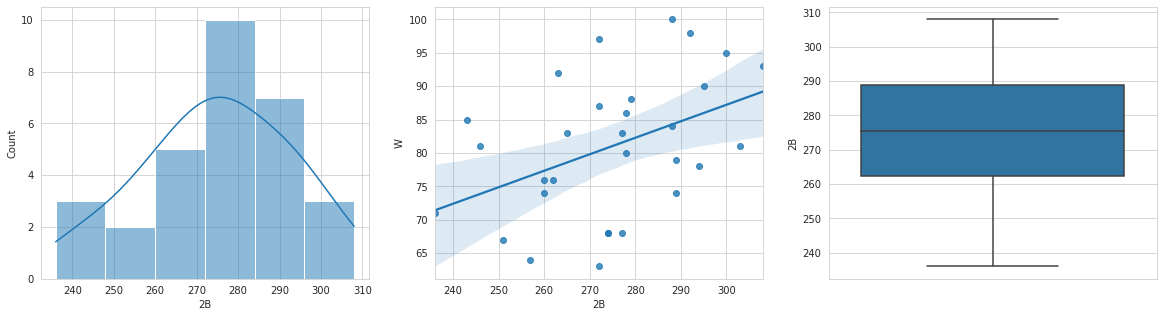

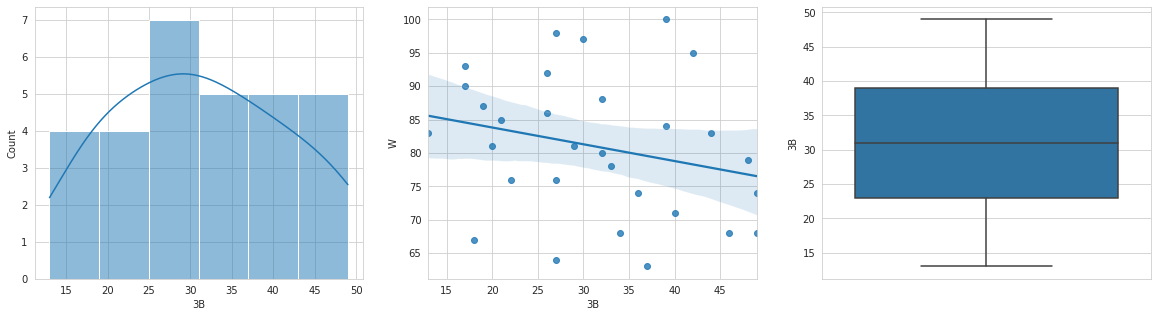

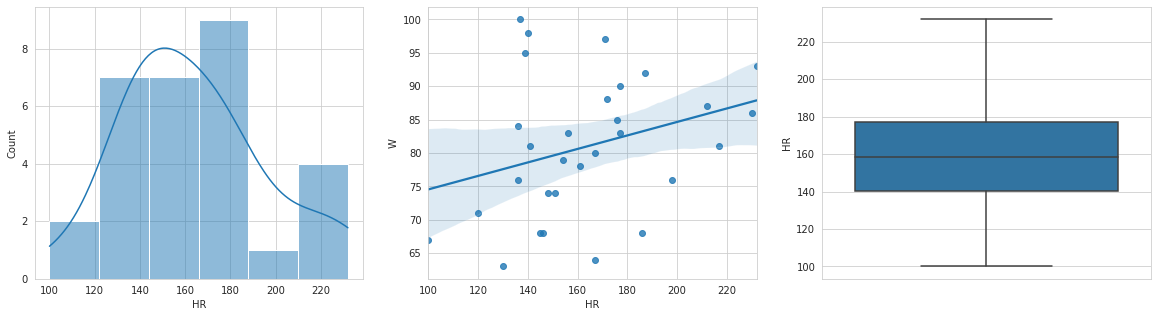

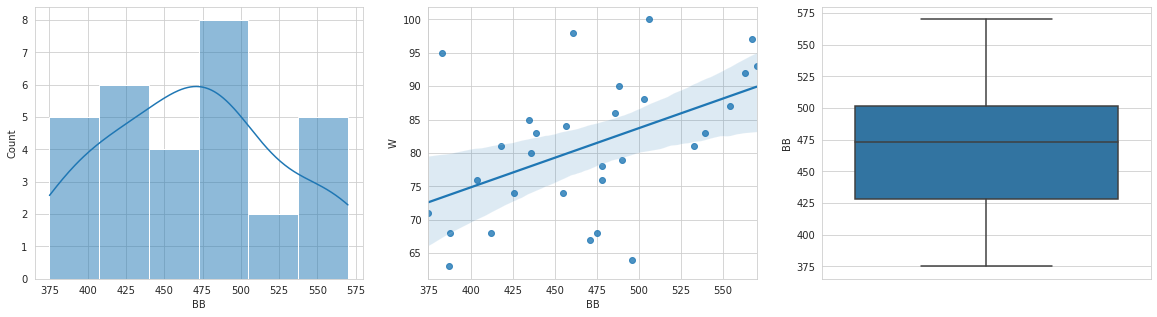

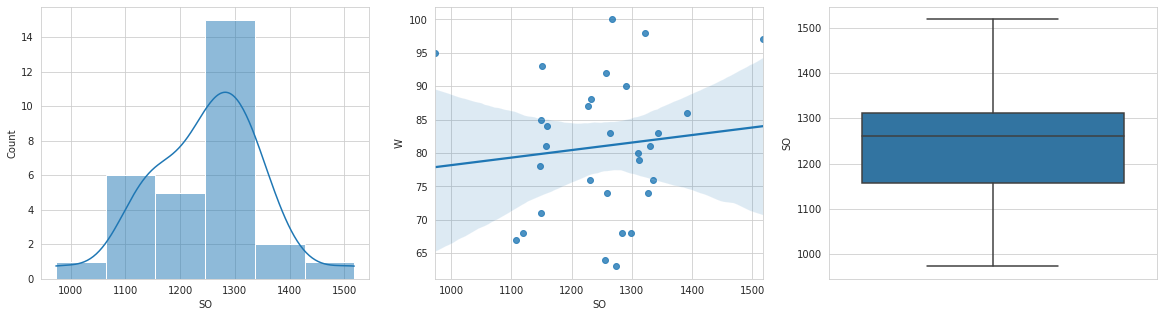

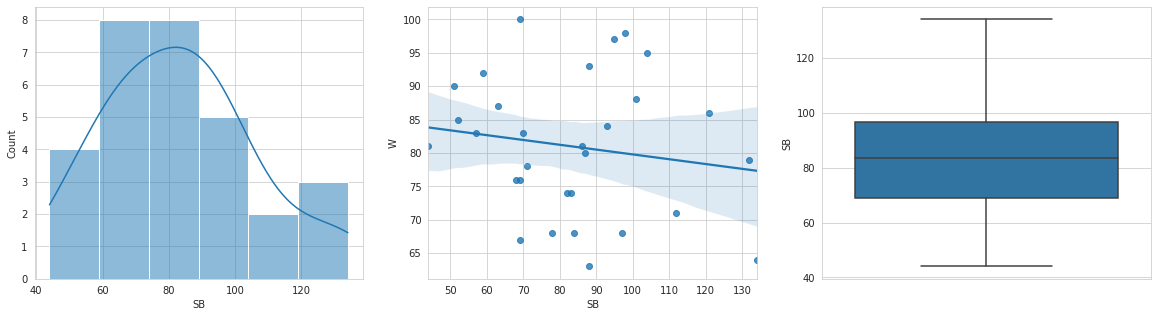

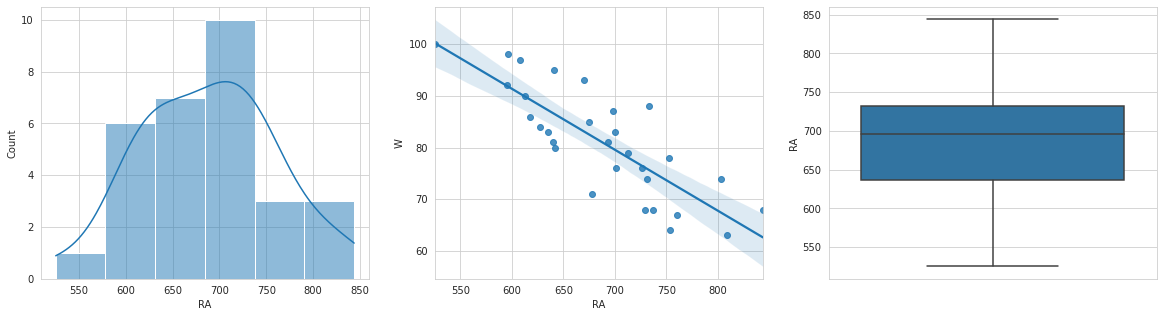

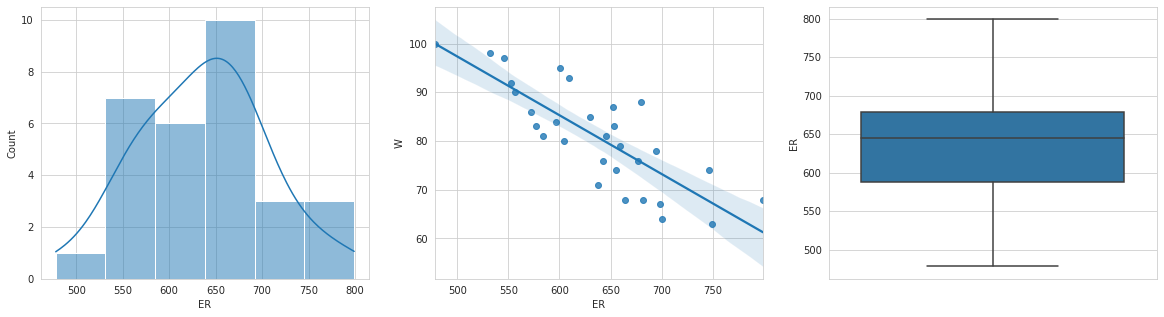

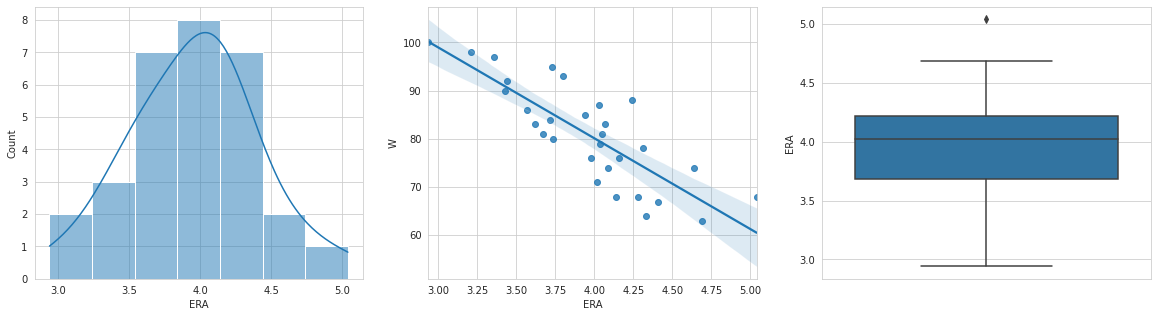

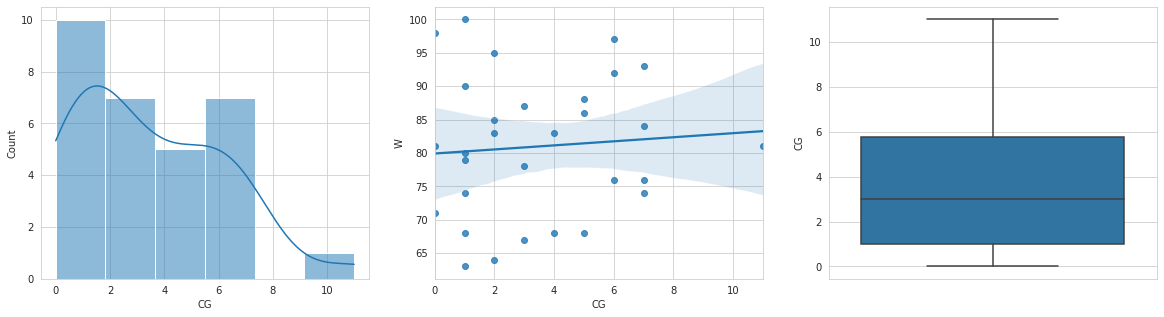

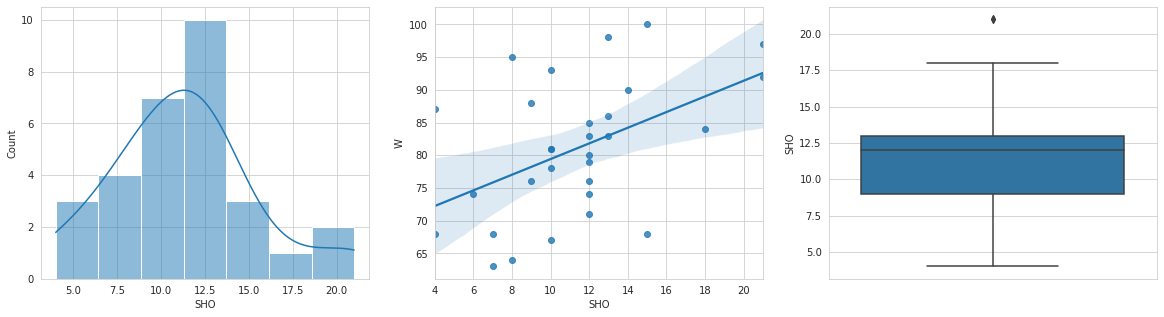

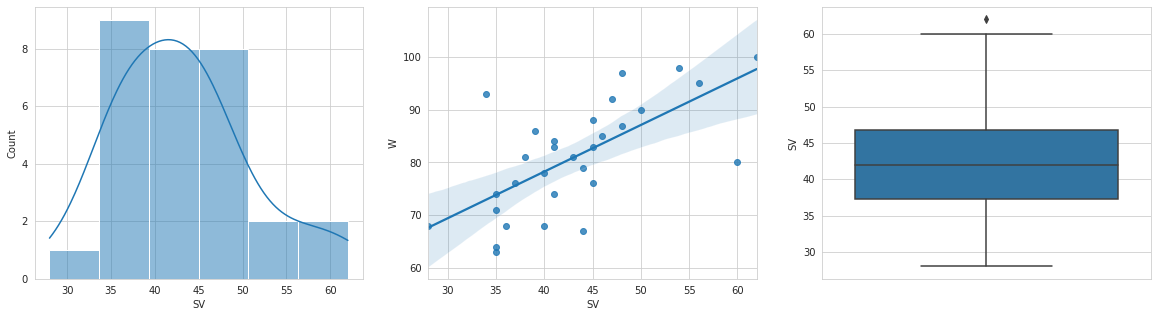

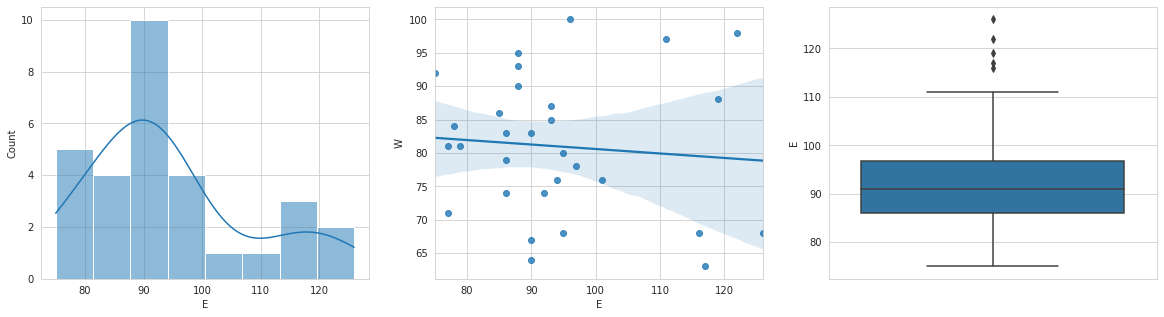

In [11]:
import scipy.stats as stat
import pylab 
for i in df.columns:
  pplot(df,i)

AB, H, so, sb, cg, E are not related to win



Data filtering:-

In [12]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


**dataset contain numeric characters**

**Encoding**:- Not required

In [13]:
x=df.drop('W',axis=1)
y=df['W']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [15]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in df.columns:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=df.columns)


In [16]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

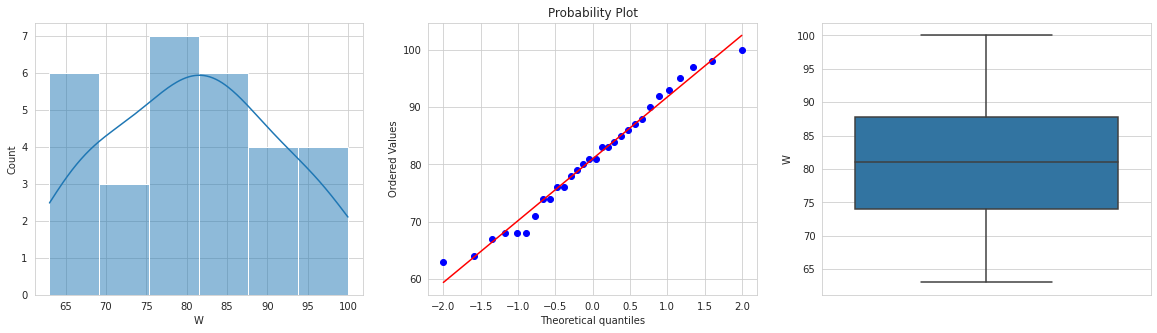

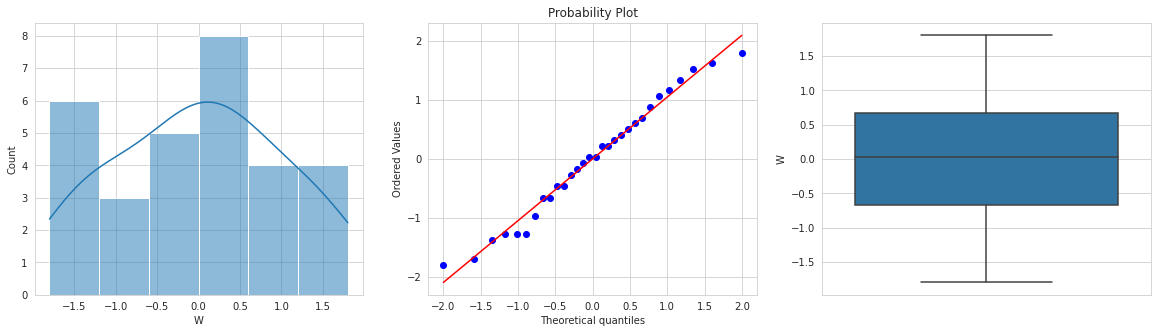

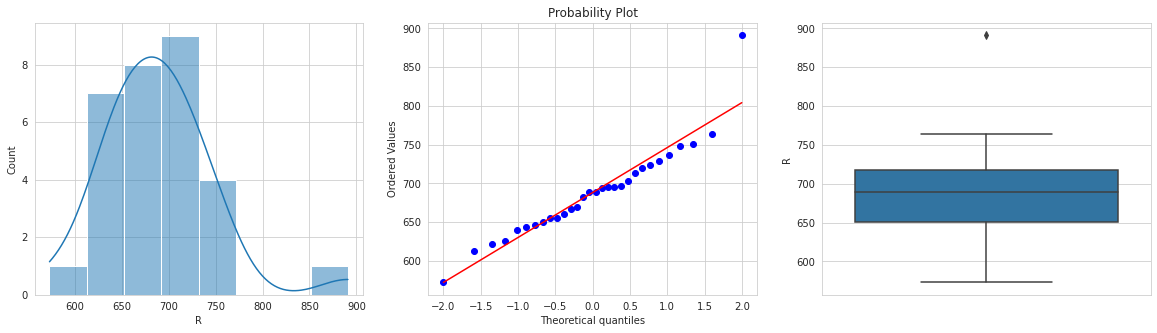

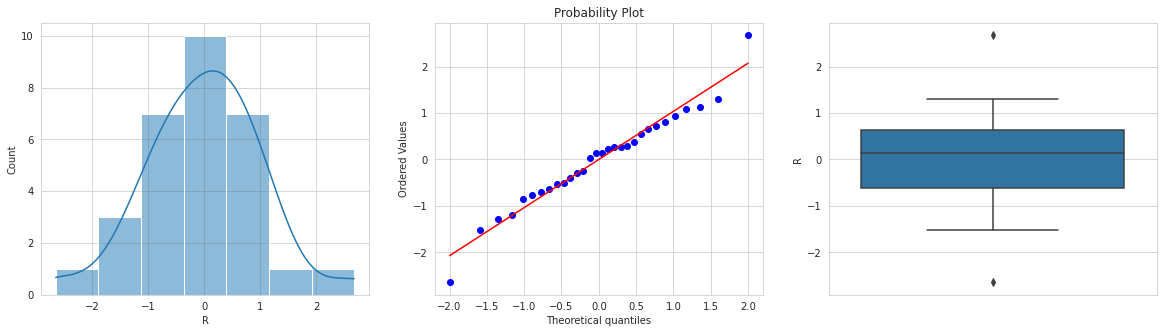

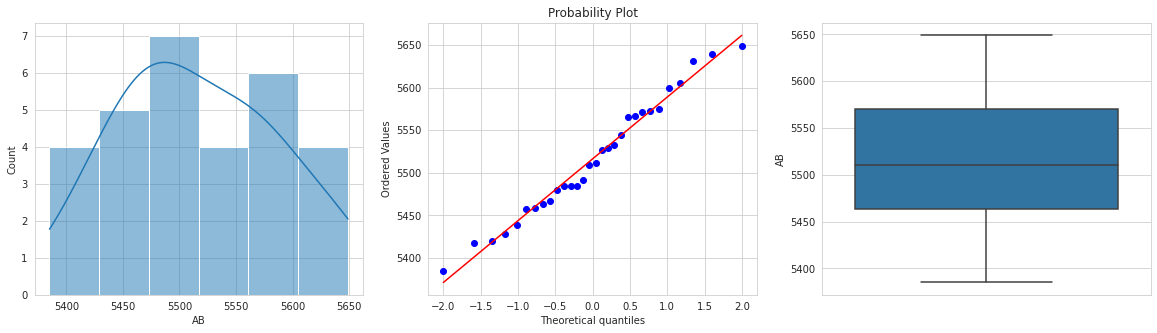

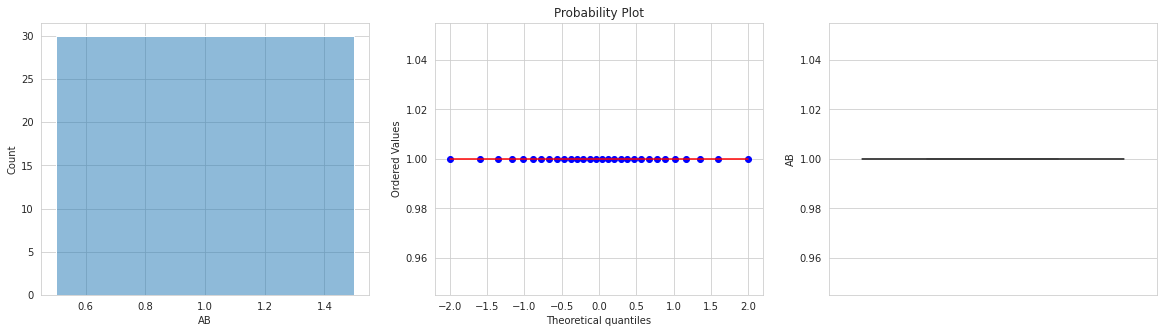

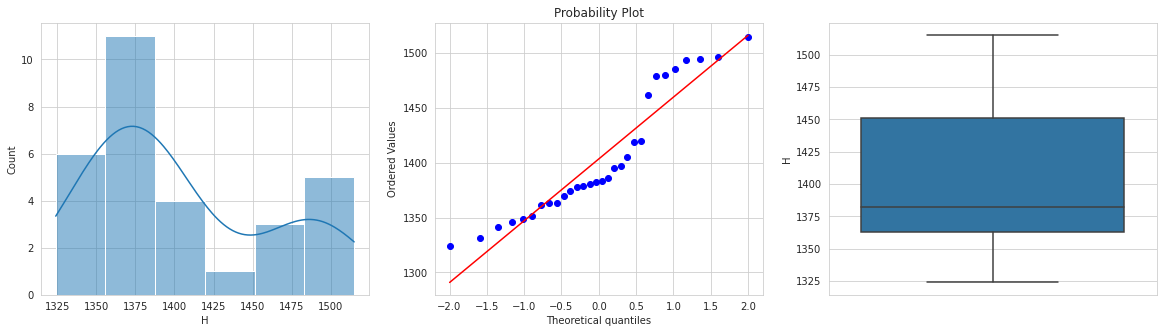

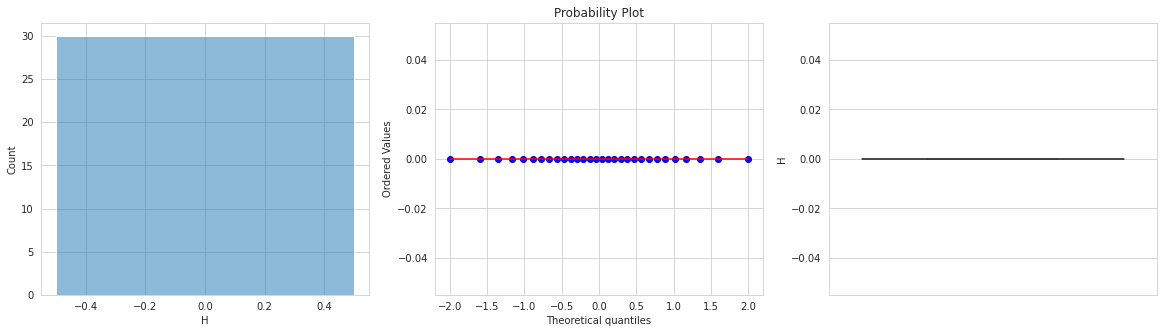

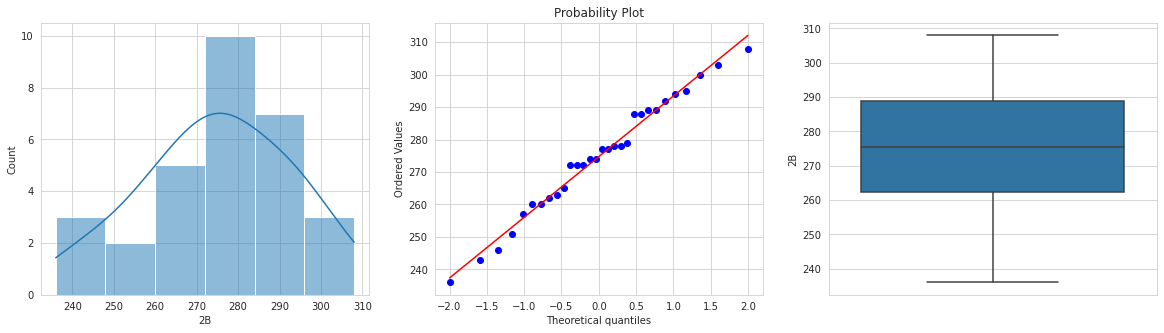

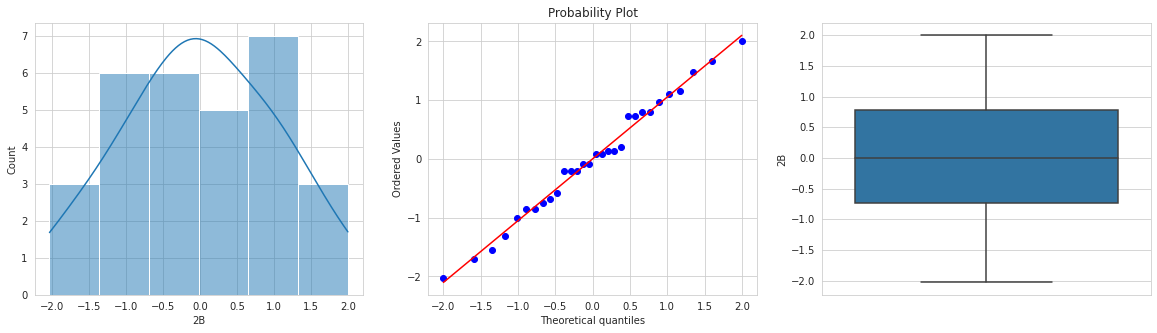

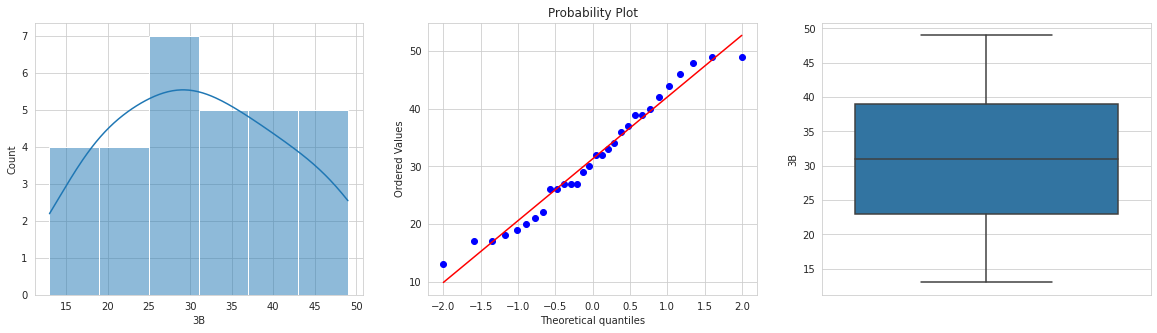

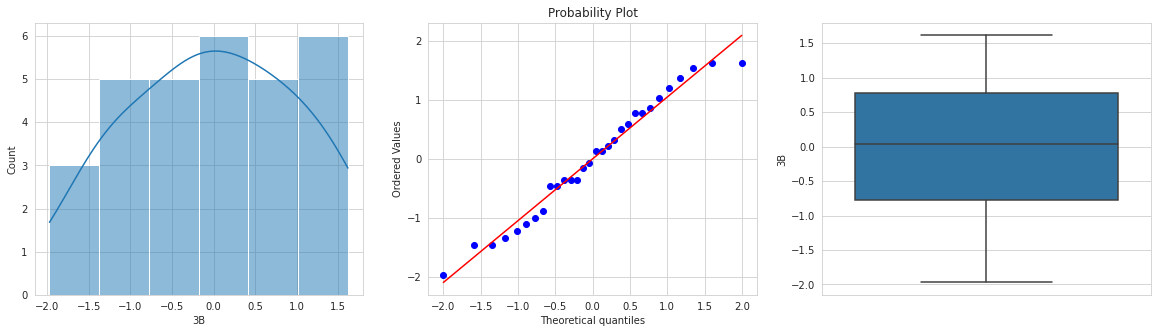

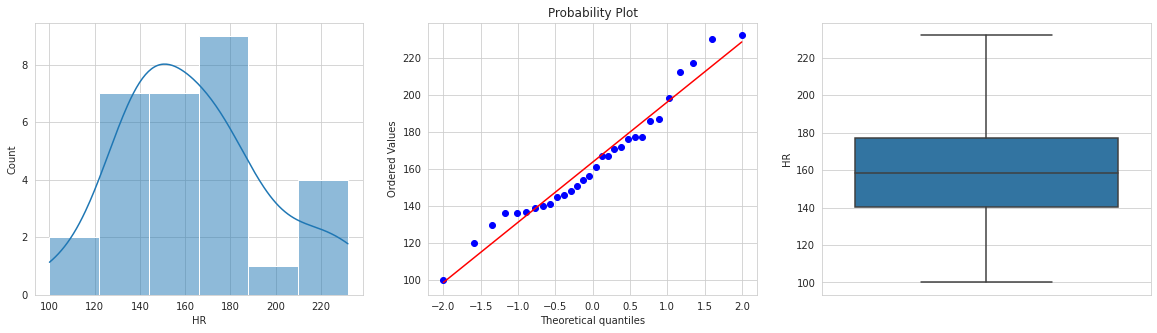

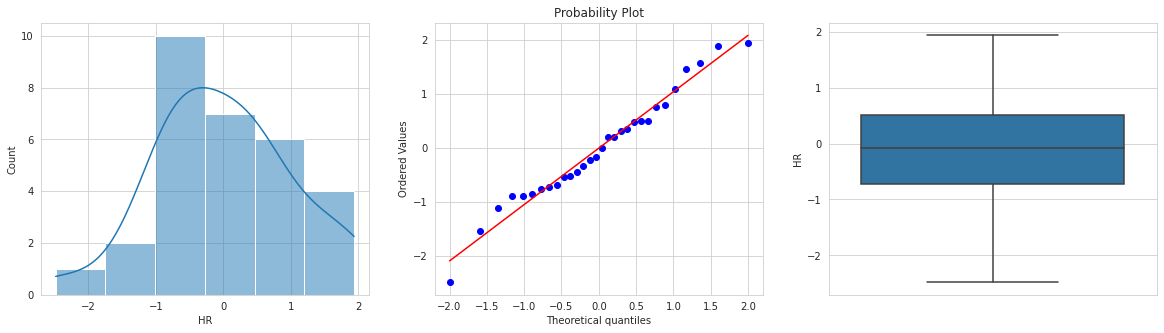

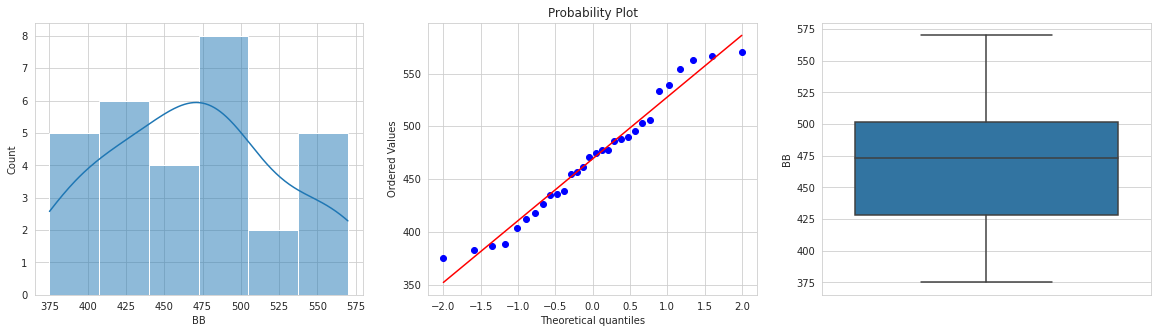

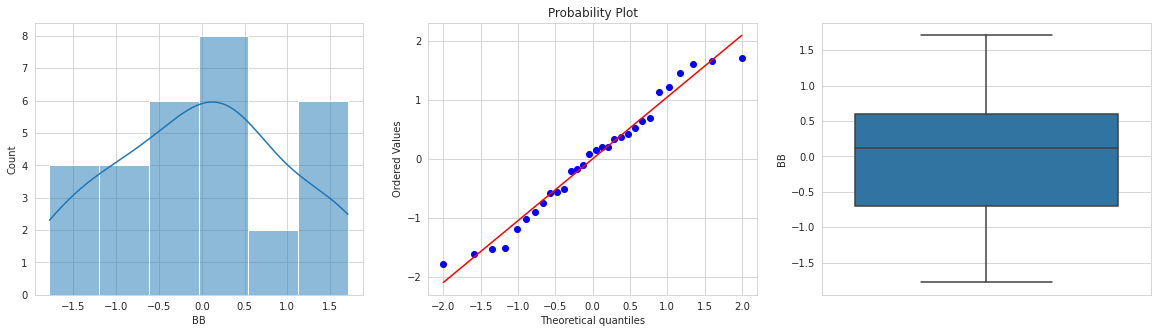

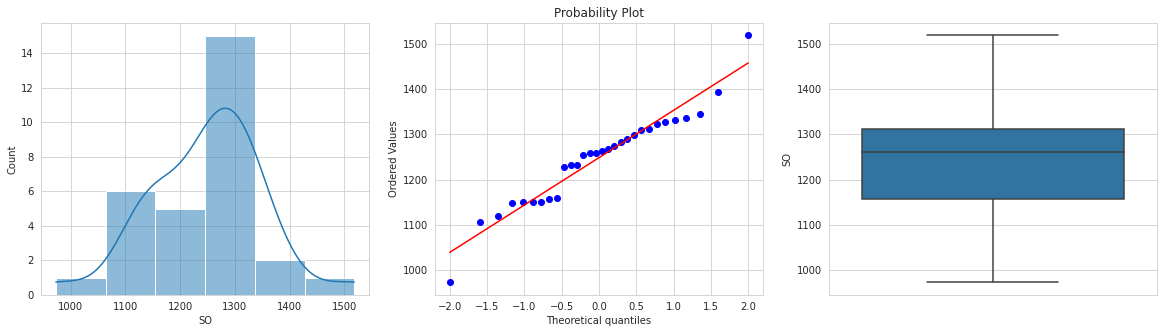

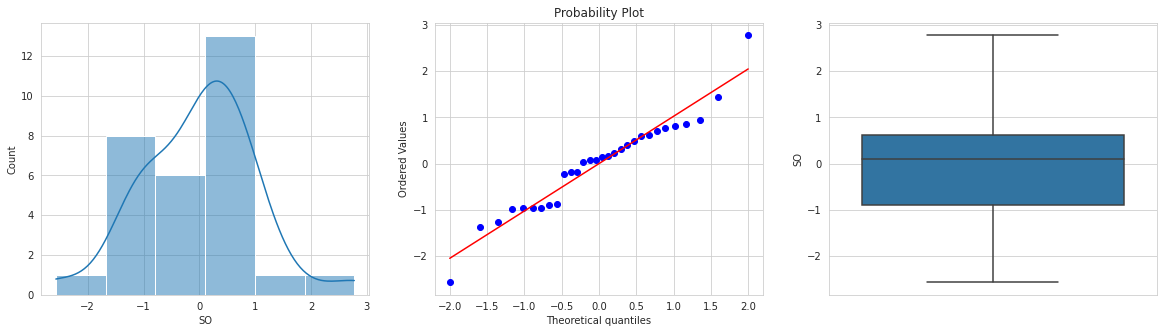

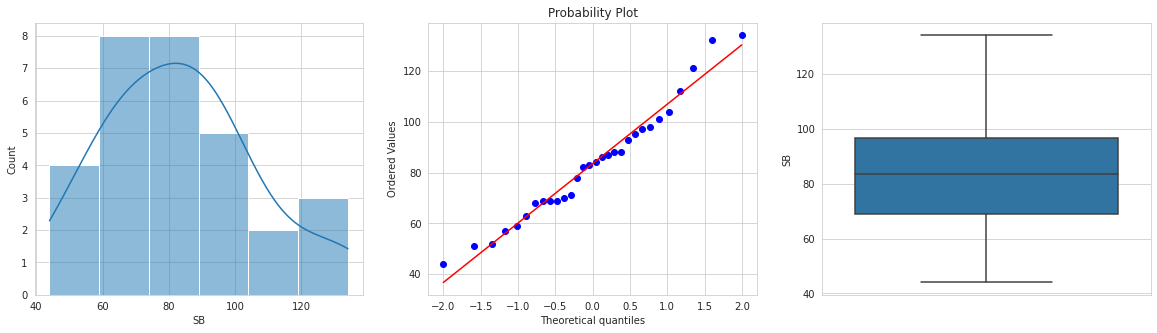

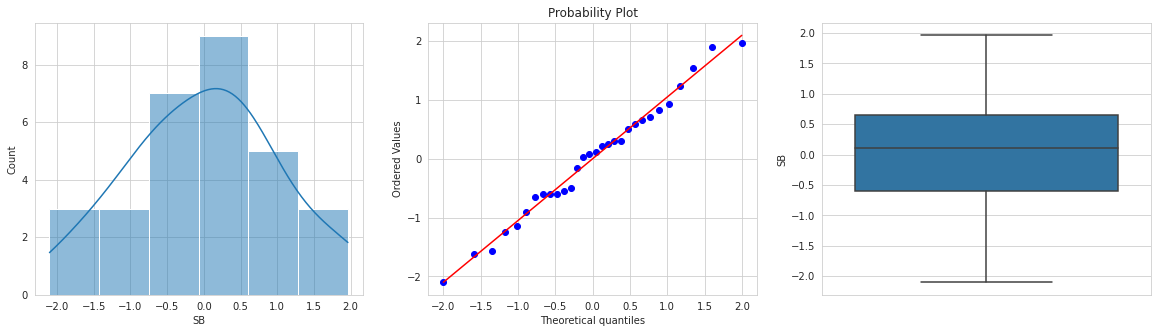

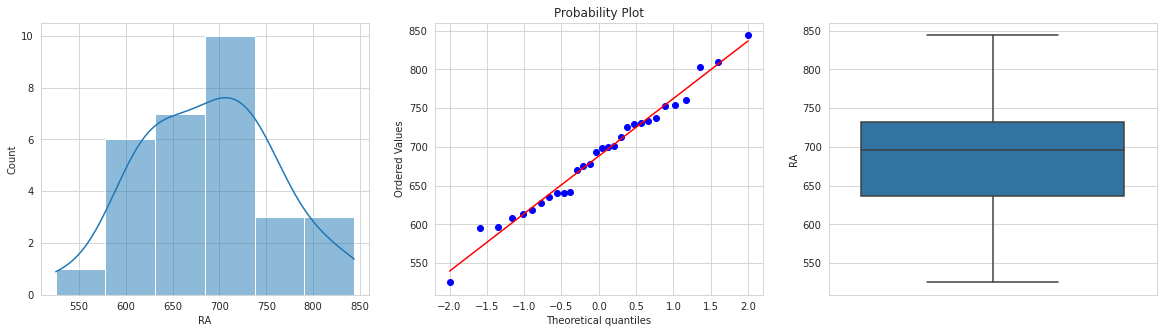

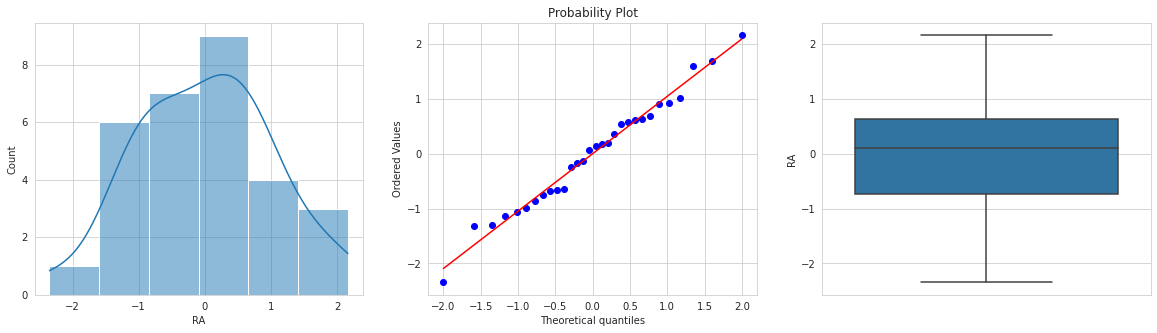

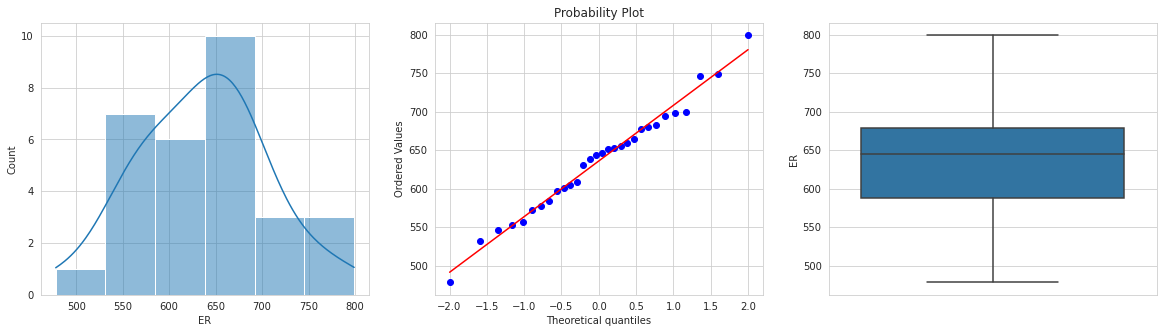

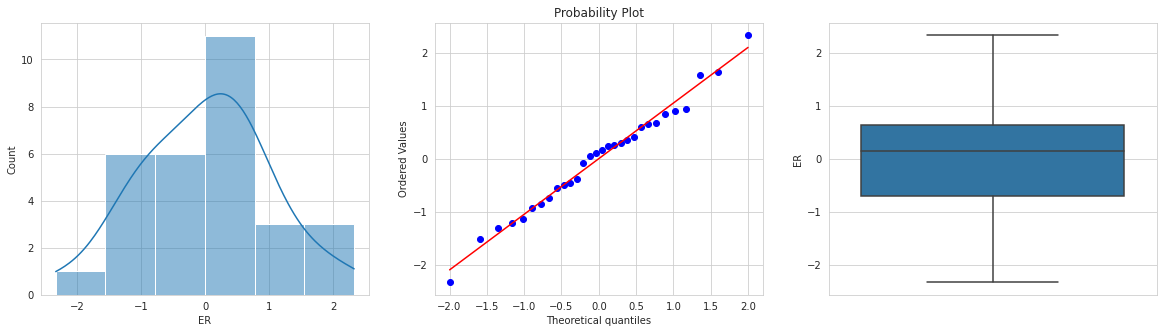

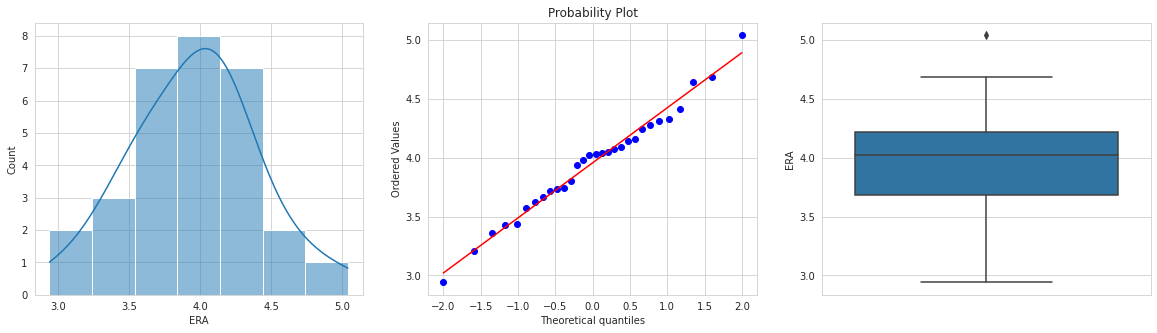

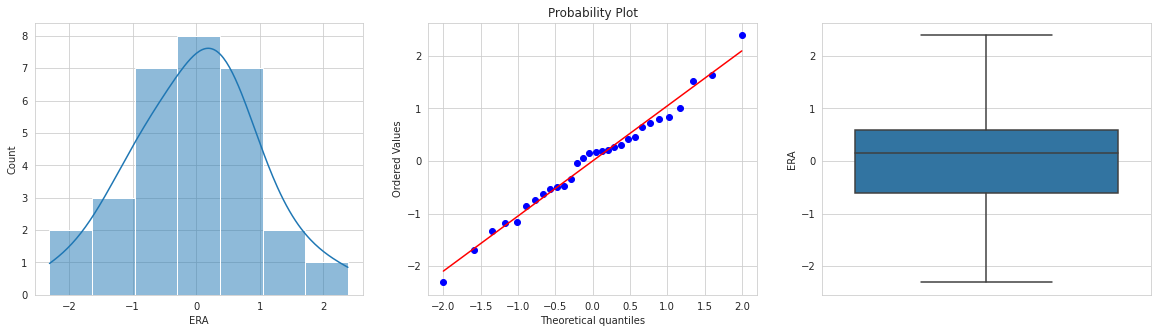

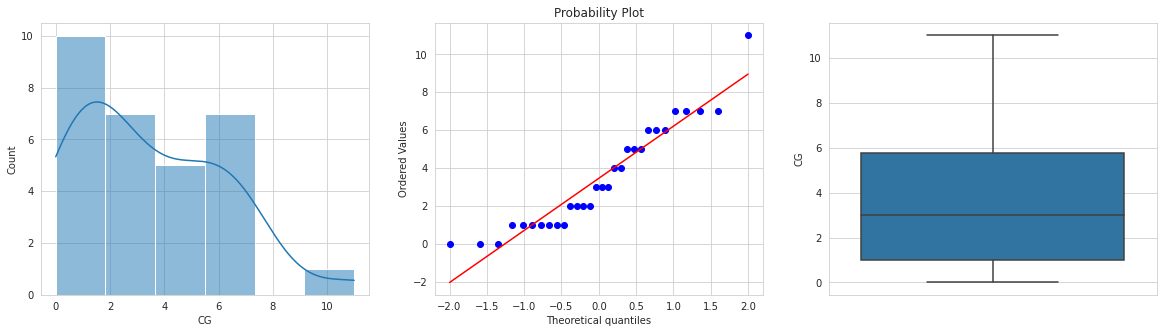

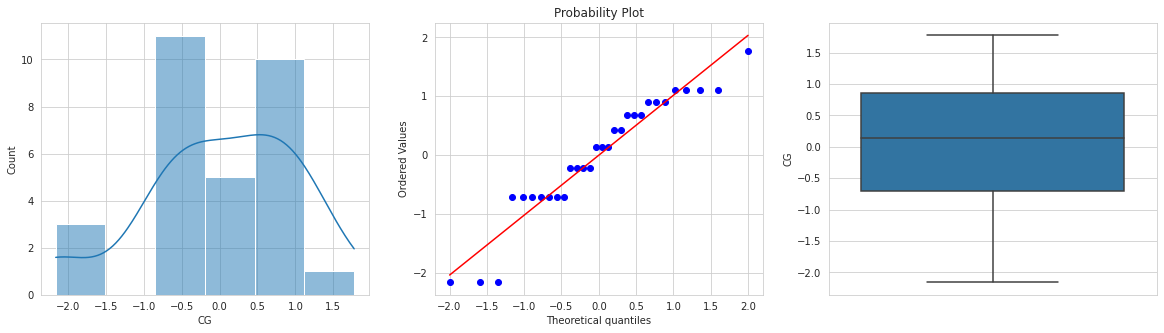

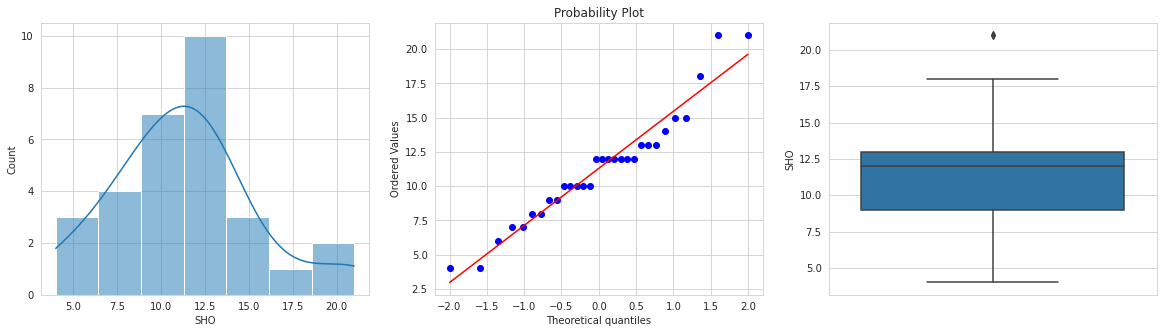

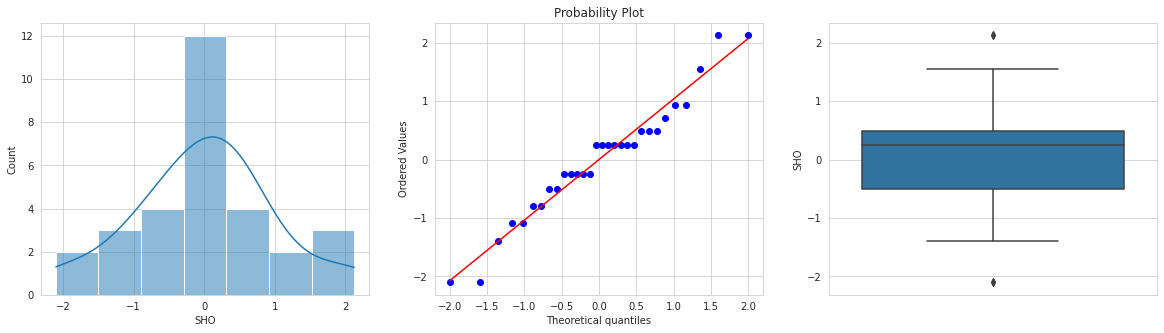

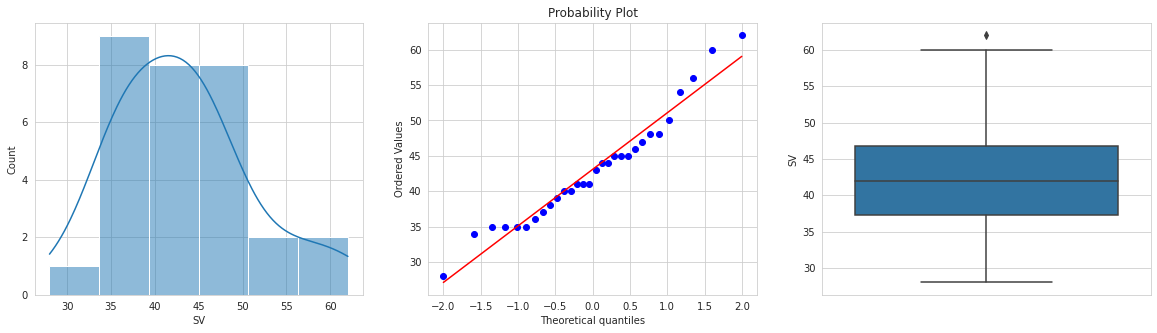

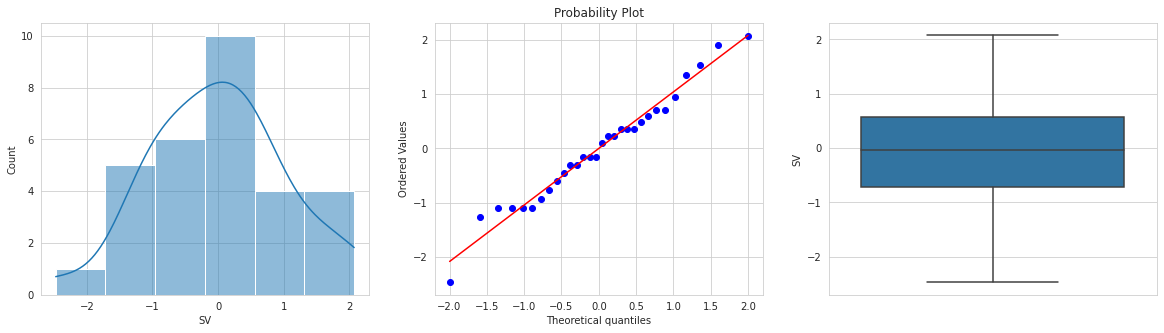

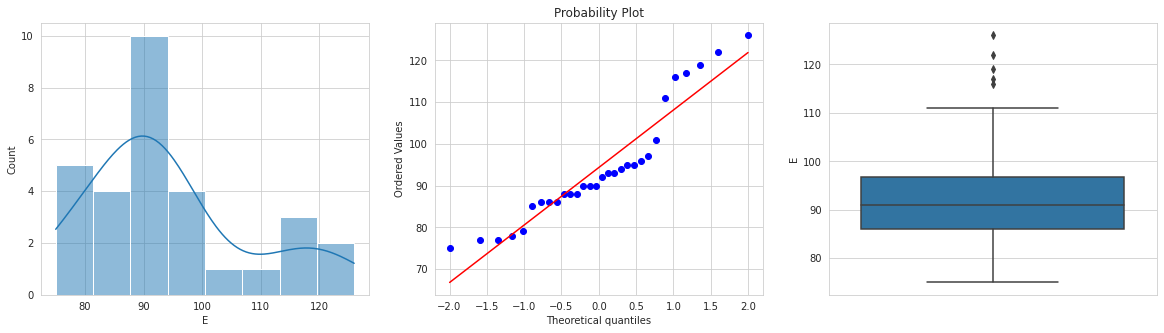

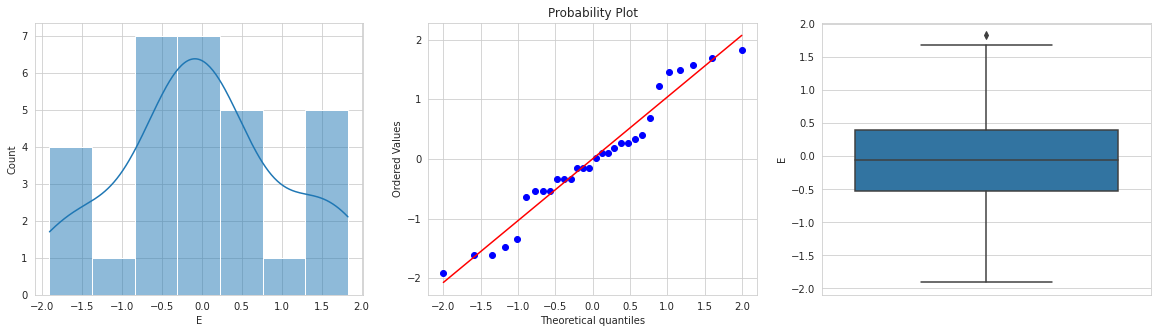

In [17]:
import scipy.stats as stat
import pylab 
for i in df.columns:
  pplot(df,i)
  pplot(pt1,i)

after transformation ab and h are totally flattened that means it has same value. so we should not apply power transform these two variables. 

In [18]:
pt1=pd.concat([pt1.drop(['AB','H'],axis=1),df[['AB','H']]],axis=1)

## **Correlation**

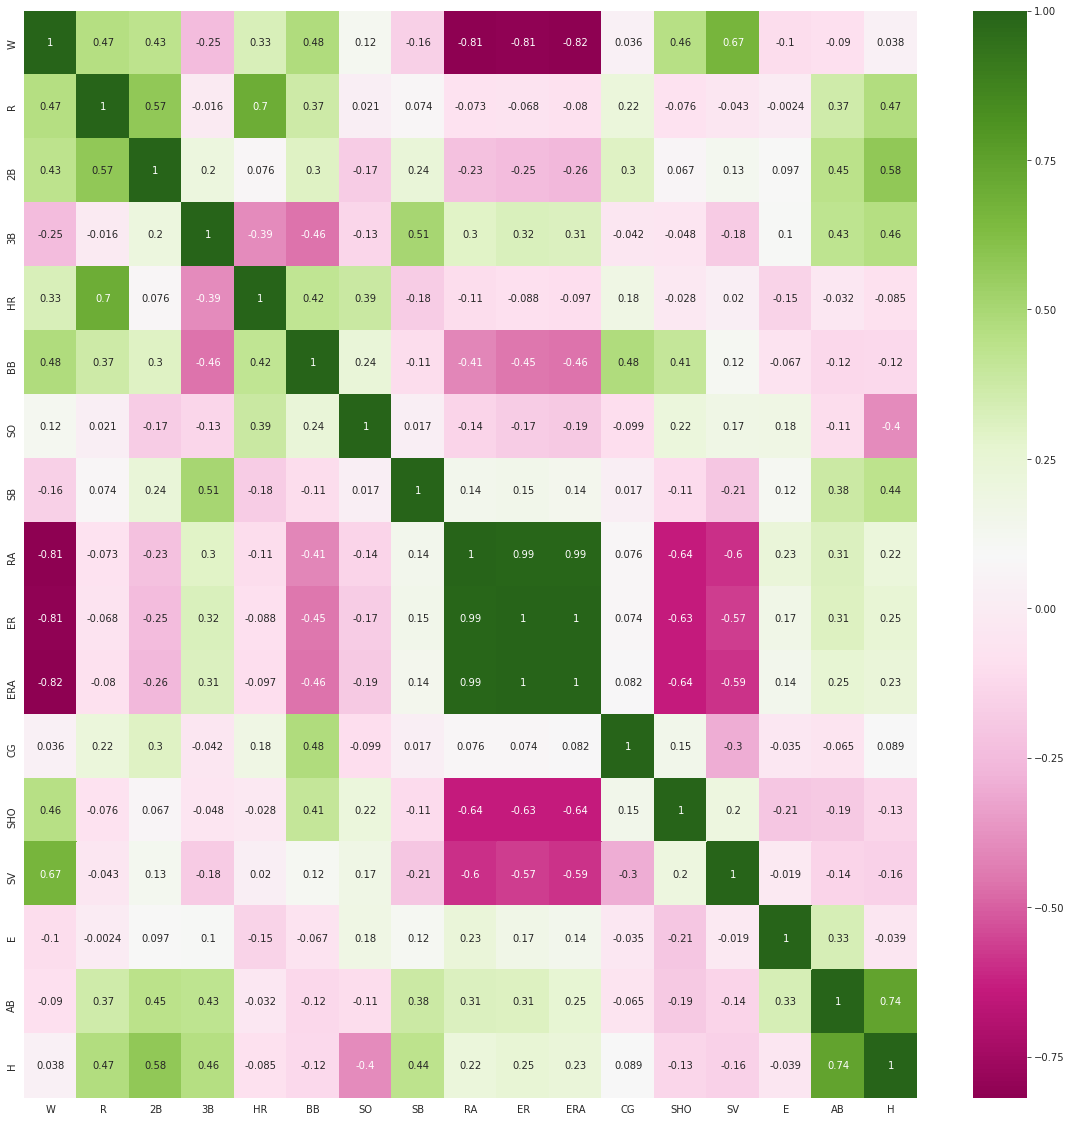

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(pt1.corr(),annot=True,cmap='PiYG')

high multicollinearity exist

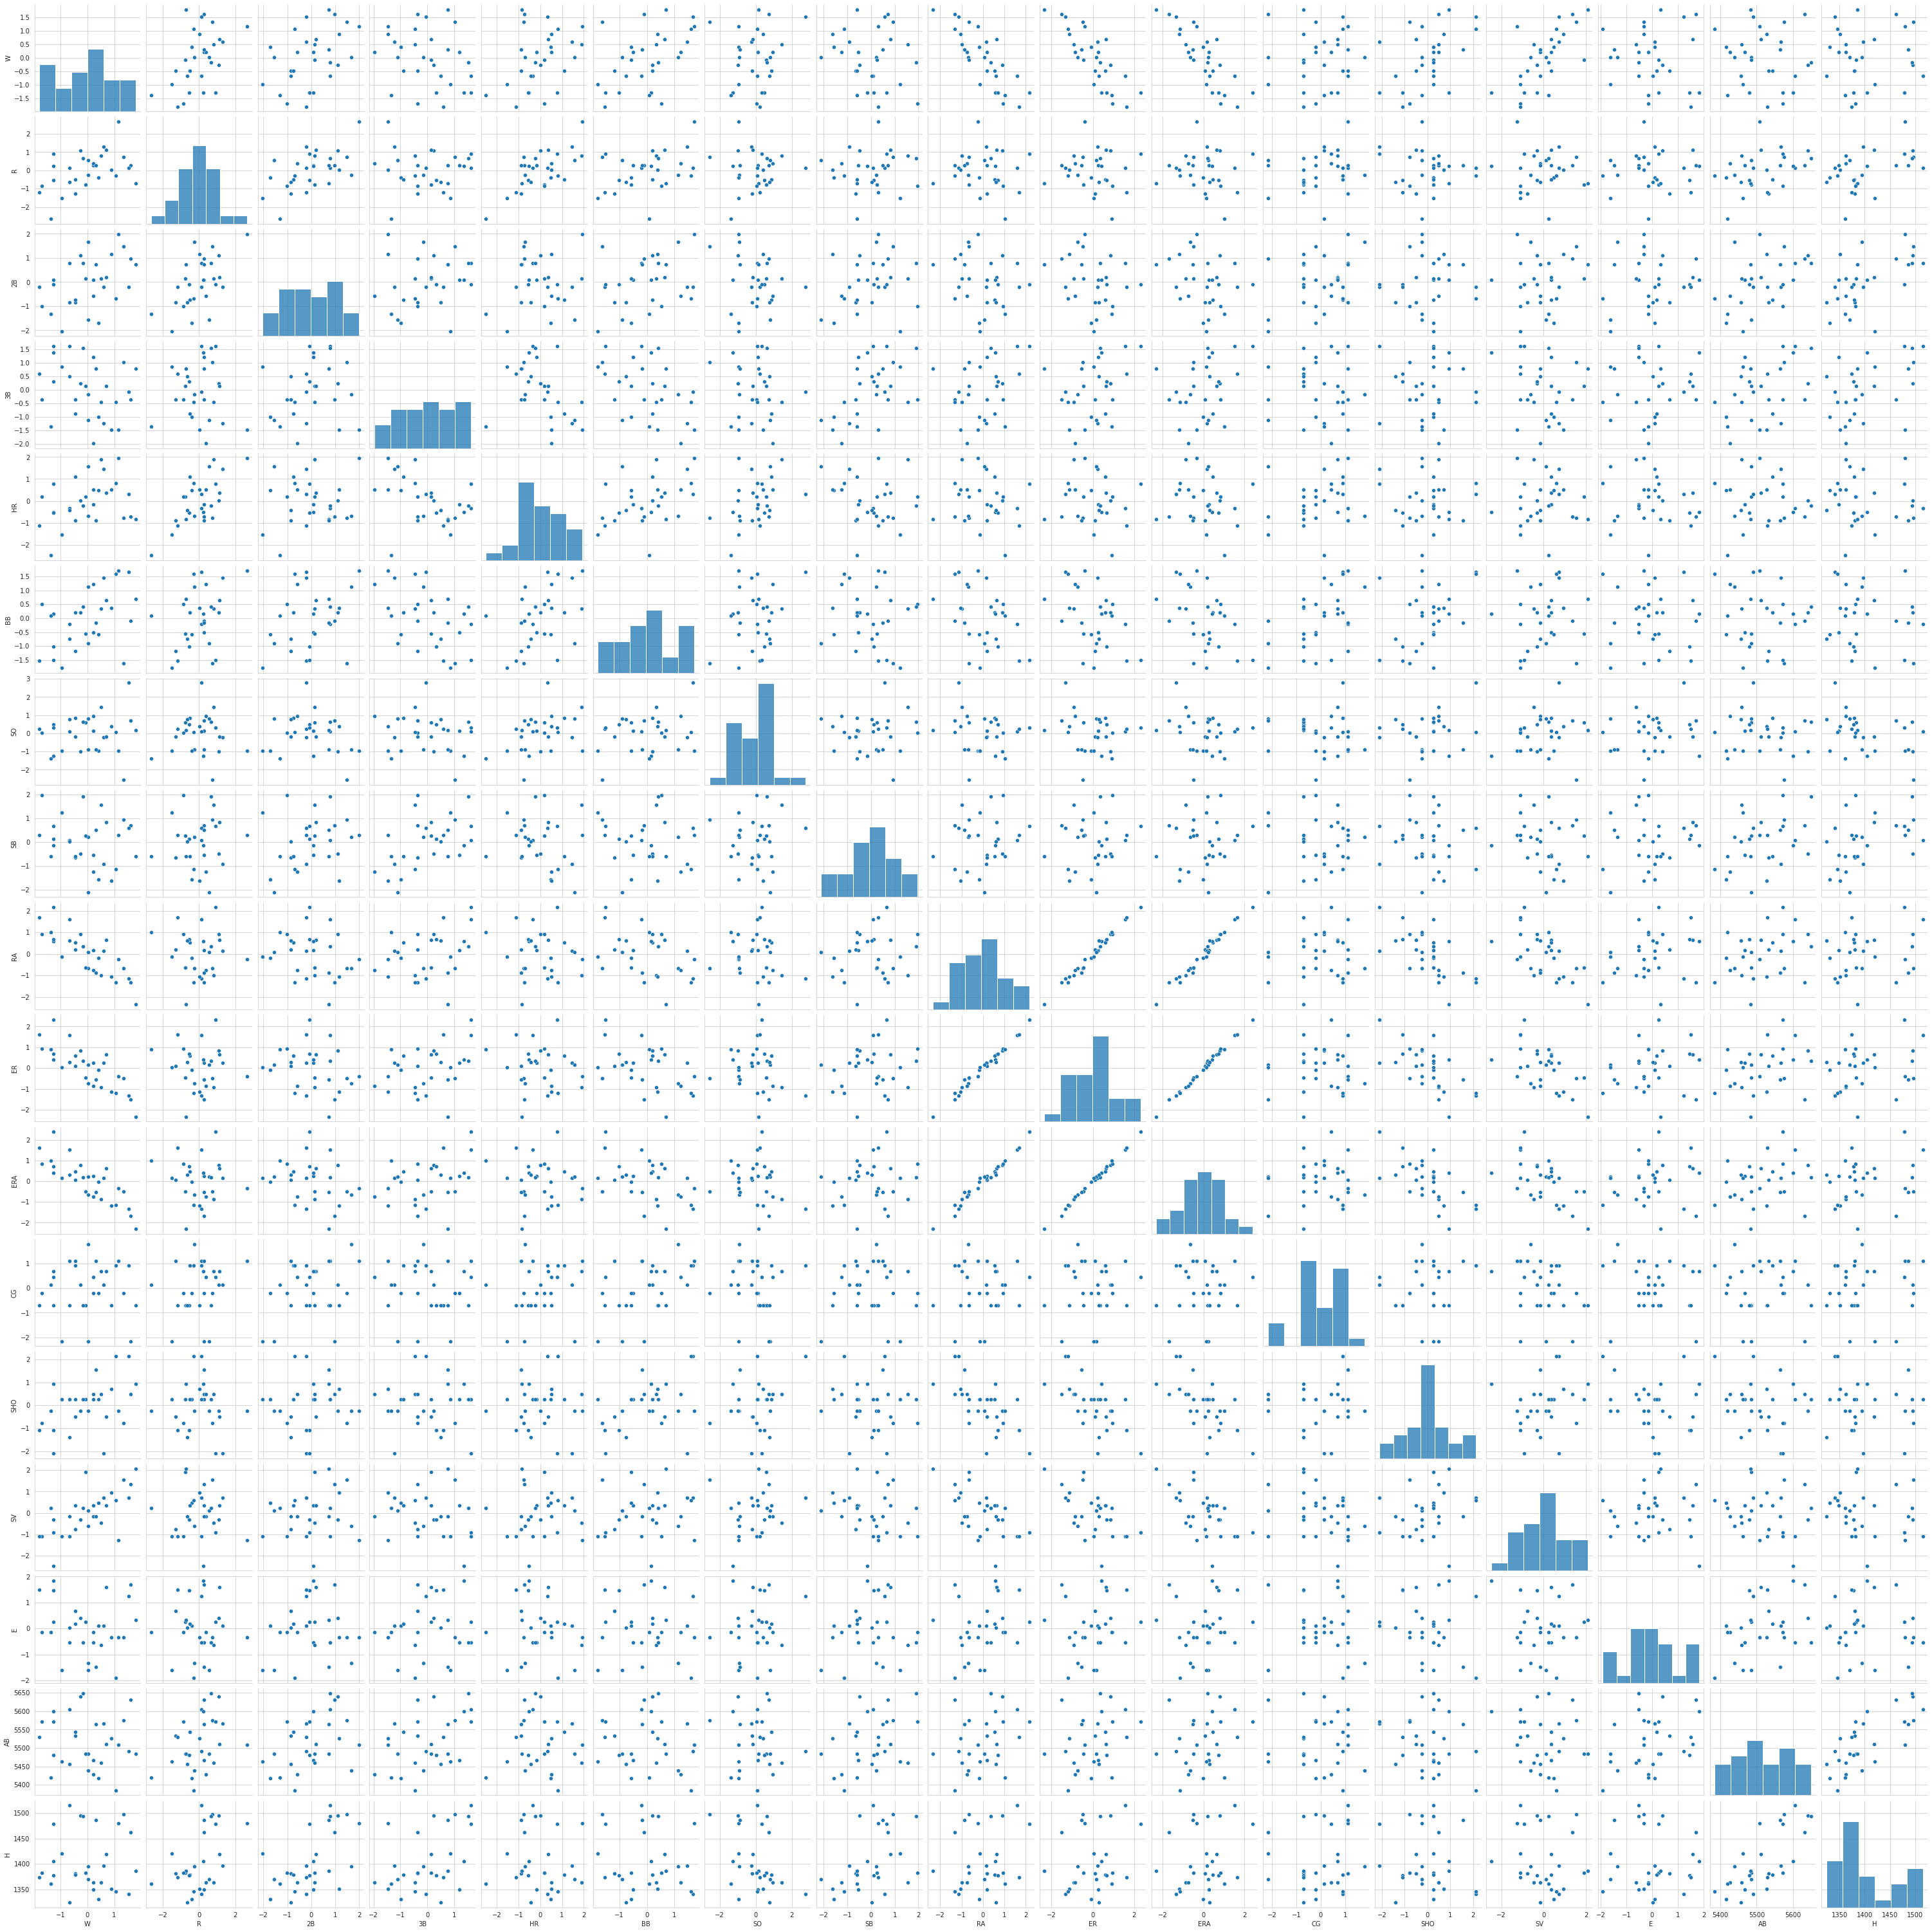

In [20]:
sns.pairplot(pt1)

## **Anova test**

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
s = SelectKBest(f_classif, k=15)
s.fit(x,y)

SelectKBest(k=15, score_func=<function f_classif at 0x7feecf30fcb0>)

In [22]:
anova=pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)
anova

,0,1
CG,0.383449,0.955385
H,0.763151,0.707804
3B,0.850035,0.647067
2B,0.904863,0.610500
HR,0.989166,0.557499
BB,1.048384,0.522774
SHO,1.204067,0.441457
SO,1.509218,0.319694
AB,1.552727,0.305758
ER,1.574876,0.298946


almost all variable are not related to output and r2 for this dataset will be negative as mostly p>0.05

So we need to analyse R2 to reduce randomness 

## **Separating dependent and independent variables**

In [38]:
x=pt1.drop('W',axis=1)
y=pt1['W']

In [39]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [41]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train,y_train)

from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(normalize=True), x, y, cv=3,scoring='r2')
lr_reg=cv_results['test_score'].mean()
r2=[]
r2.append(lr_reg)
j=1
k=1
least_r21=-10
while j==1:
  for i in x.columns:
    demo_x=x.drop(i,axis=1)
    cv_results = cross_validate(lr(normalize=True), demo_x, y, cv=3,scoring='r2')
    lr_reg1=cv_results['test_score'].mean()
    if lr_reg1>lr_reg:
      least=i
      least_r2=lr_reg1
      lr_reg=lr_reg1
      
  if least_r21<least_r2:
    print(str(least) + 'is having r2 score of' + str(least_r2))
    least_r21=least_r2
    x.drop(least,axis=1,inplace=True)
    r2.append(lr_reg)
    k=k+1
  else:
    j=0


    

  


2Bis having r2 score of0.3155885387308122
SHOis having r2 score of0.47079958480771583
BBis having r2 score of0.6363255631483751
SOis having r2 score of0.695078376639599
RAis having r2 score of0.7637325560440447
3Bis having r2 score of0.7739654209701806
SBis having r2 score of0.792074497514084
Eis having r2 score of0.8137745187033779


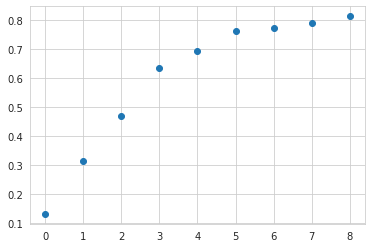

In [42]:
plt.scatter(range(k),r2)

As discussed earlier randomness is present in the data set. In other words, the lower the R squared value higher is the randomness. so this function is comparing every feature in the data set by dropping them and comparing the value R square. The feature resulting in maximum R square value is dropped this is Iterated till the value of R square doesn't increase or in other words, the value of R square will saturate.

In [43]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

# **Model Evaluation**

## **Linear Regression**



In [45]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train,y_train)
y_pred=reg_lr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
lr_e=r2_score(y_test,y_pred)

0.860243195662997
0.35026164434776635


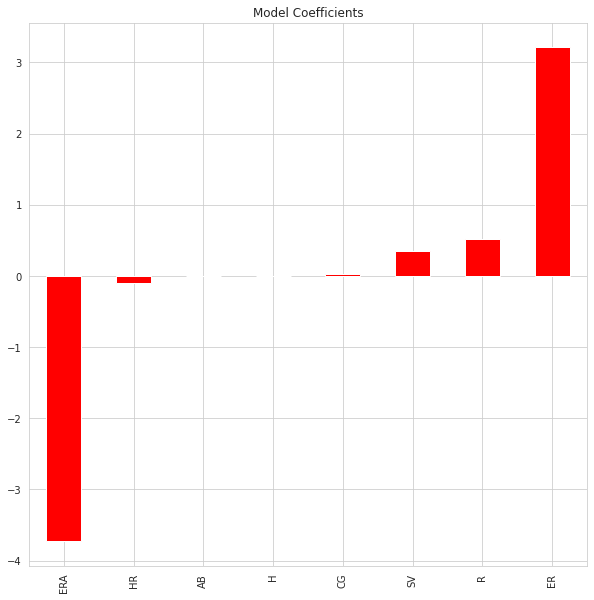

In [46]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [47]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(normalize=True), x, y, cv=3,scoring='r2')

lr_reg=cv_results['test_score'].mean()

In [48]:
lr_reg

0.8137745187033779

## **Ridge**(0.31)

In [49]:
from sklearn.linear_model import Ridge
reg_lr = Ridge().fit(X=x_train_scaler,y=y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
ridge_e=r2_score(y_test,y_pred)

0.868350817507858
0.32077617007545617


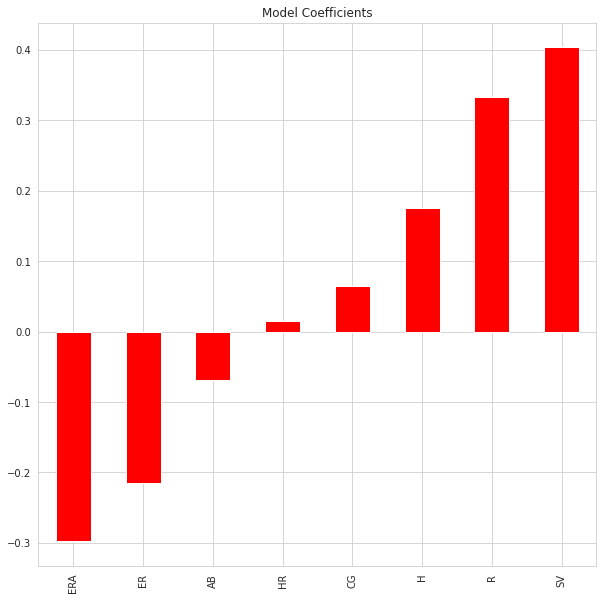

In [50]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [51]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(), ss.transform(x), y, cv=3)

rid_reg=cv_results['test_score'].mean()

In [52]:
rid_reg

0.8008916315593902

## **Random Forest Regressor**


In [53]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
rfr_e=r2_score(y_test,y_pred)

0.7398407784525378
0.5089358669766907


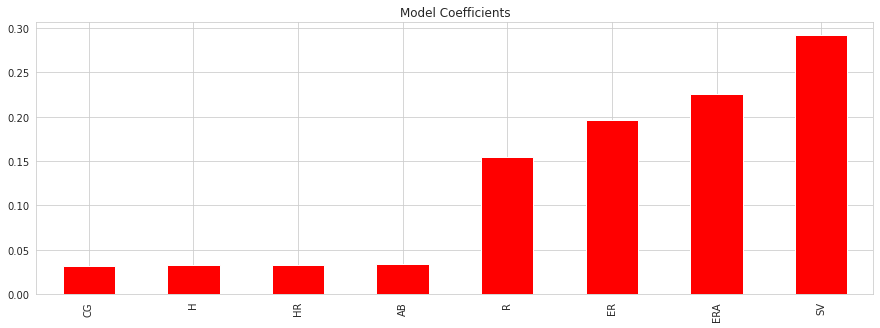

In [54]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [55]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=3)

rfc_score=cv_results['test_score']


In [56]:
rfc_reg=rfc_score.mean()

In [57]:
rfc_reg

0.475383519222194

## **XGB Regressor**

In [58]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
xgb_e=r2_score(y_test,y_pred)

[16:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7701053778382503
0.4788736447044484


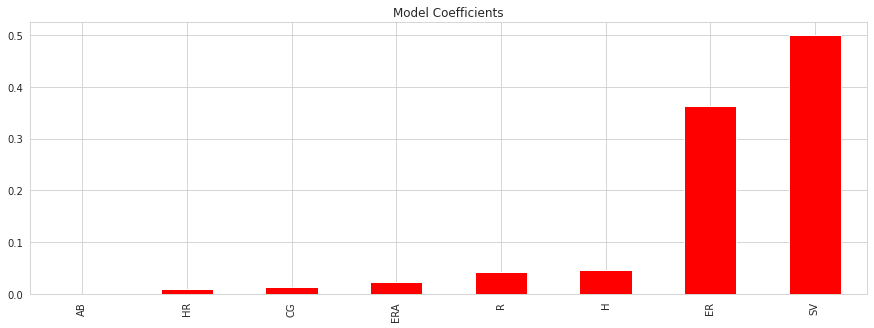

In [59]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [60]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=3)

xgr_score=cv_results['test_score'].mean()




[16:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
xgr_score

0.5099915654806227

## **Extra Tree Regressor**

In [62]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
etr_e=r2_score(y_test,y_pred)

0.2225230128141258
0.8057164842744369


In [63]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=3)

etc_score=cv_results['test_score'].mean()


In [64]:
etc_score

0.11056721043750573

## **Support vector Regressor**

In [65]:
from sklearn.svm import SVR

svc = SVR(kernel='linear')
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
svm_e=r2_score(y_test,y_pred)

0.8811538663591085
0.3061872266297451


In [66]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(kernel='linear'), ss.transform(x), y, cv=3)

svc_score=cv_results['test_score'].mean()


In [67]:
svc_score

0.7996188162718827

## **Comparing models**

In [68]:
score=[lr_reg,rid_reg,rfc_reg,xgr_score,etc_score,svc_score]
error=[lr_e,ridge_e,rfr_e,xgb_e,etr_e,svm_e]
name=['LR','Ridge','RFC','XGB','ETC','SVC']
diff=[]
for i in range(6):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

,0,1,2,3
0,LR,0.813775,0.860243,-0.0464687
1,Ridge,0.800892,0.868351,-0.0674592
2,RFC,0.475384,0.739841,-0.264457
3,XGB,0.509992,0.770105,-0.260114
4,ETC,0.110567,0.222523,-0.111956
5,SVC,0.799619,0.881154,-0.0815351


Ridge and SVC can be selected for Hyperparameter 

# **Hyper-parameter tuning** 

## **Ridge**




In [69]:
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
xg_grid.fit(x_train_scaler, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.7985171694022105
Best score: {'alpha': 2}
Best score: Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [85]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001), ss.transform(x), y, cv=3)

hp_ridge=cv_results['test_score']

In [86]:
hp_ridge.mean()

0.8025588648276285

In [87]:
rid=Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001).fit(x_train_scaler,y_train)

## **Support vector classifier**

In [73]:
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.05,0.1,0.5,1,2,5]}

svc_grid = GridSearchCV(SVR(), params, cv=3)
svc_grid.fit(ss.transform(x), y)

print('Best score:', svc_grid.best_score_)
print('Best score:', svc_grid.best_params_)
print('Best score:', svc_grid.best_estimator_)

Best score: 0.7996188162718827
Best score: {'C': 1, 'kernel': 'linear'}
Best score: SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [74]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(C=0.5,kernel='linear'), ss.transform(x), y, cv=3)

hp_SVR=cv_results['test_score'].mean()

In [75]:
hp_SVR

0.7869286925047417

In [76]:
svr = SVR(C=1,kernel='sigmoid')
svr.fit(x_train_scaler,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# **Best Model Evaluation**

In [89]:
y_pred = rid.predict(ss.transform(x))
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.9125258631717021
0.08747413682829788


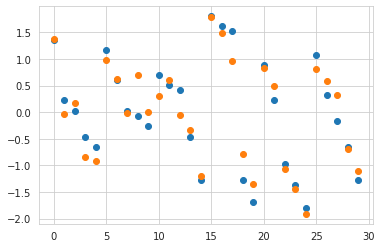

In [98]:
plt.scatter(x=y.index,y=y,cmap='blue')
plt.scatter(x=y.index,y=y_pred,cmap='red')

(array([2., 2., 4., 6., 6., 3., 4., 2., 0., 1.]),
 array([-0.57479331, -0.43993964, -0.30508598, -0.17023231, -0.03537864,
         0.09947502,  0.23432869,  0.36918236,  0.50403602,  0.63888969,
         0.77374335]),
 <a list of 10 Patch objects>)

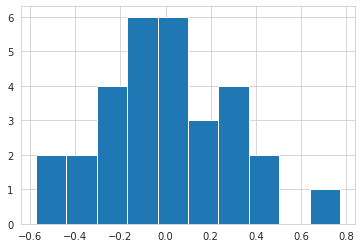

In [91]:
plt.hist((y_pred-y))

# **Saving the model** 

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pickle

filename = '/content/drive/MyDrive/datatrained/baseball/model.sav'
pickle.dump(rid, open(filename, 'wb'))

# **Conclusion**

In [94]:

filename = '/content/drive/MyDrive/datatrained/baseball/model.sav'
model = pickle.load(open(filename, 'rb'))

In [96]:
y_pred = model.predict(ss.transform(x))
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.9125258631717021
0.08747413682829788


In [97]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.376074,-0.041979,0.176134,-0.844654,-0.911648,0.980680,0.620076,-0.014702,0.701836,-0.001493,0.295484,0.601993,-0.048368,-0.337157,-1.195182,1.793348,1.482638,0.955099,-0.787242,-1.342853,0.835282,0.498874,-1.069343,-1.448065,-1.913629,0.808695,0.582685,0.313065,-0.692893,-1.105992
W,1.346831,0.218776,0.025401,-0.465455,-0.664924,1.162425,0.600735,0.025401,-0.071908,-0.267804,0.695263,0.505828,0.410537,-0.465455,-1.274917,1.802043,1.620930,1.529892,-1.274917,-1.692009,0.883208,0.218776,-0.967679,-1.378372,-1.797684,1.069705,0.314855,-0.169640,-0.664924,-1.274917
